# Korelation

In [1]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv("data/tmp/encoded_train.csv")
data.head()

,Day,Month,Year,Hour,Minute,Night,Holiday,Block,lat,long,...,StreetType-CR,StreetType-OTHER,StreetType-AL,StreetType-WK,StreetType-RW,StreetType-I-80,Season-Spring,Season-Winter,Season-Fall,Season-Summer
0,13,5,12,23,53,1,0,0,0.312945,-0.123472,...,0,0,0,0,0,0,1,0,0,0
1,13,5,12,23,53,1,0,0,0.312945,-0.123472,...,0,0,0,0,0,0,1,0,0,0
2,13,5,12,23,33,1,0,0,1.381231,-0.063006,...,0,0,0,0,0,0,1,0,0,0
3,13,5,12,23,30,1,0,16,1.400196,-0.167127,...,0,0,0,0,0,0,1,0,0,0
4,13,5,12,23,30,1,0,2,0.186425,-0.631594,...,0,0,0,0,0,0,1,0,0,0


In [3]:
def create_columns_for_unique_values(df, column):
    unique_values = df[column].unique()
    for value in unique_values:
        df[column + "-" + value] = (df[column] == value).astype(int)

create_columns_for_unique_values(data,'Category')


## Calculate Korrelation between category and binary features

Binär und Binär

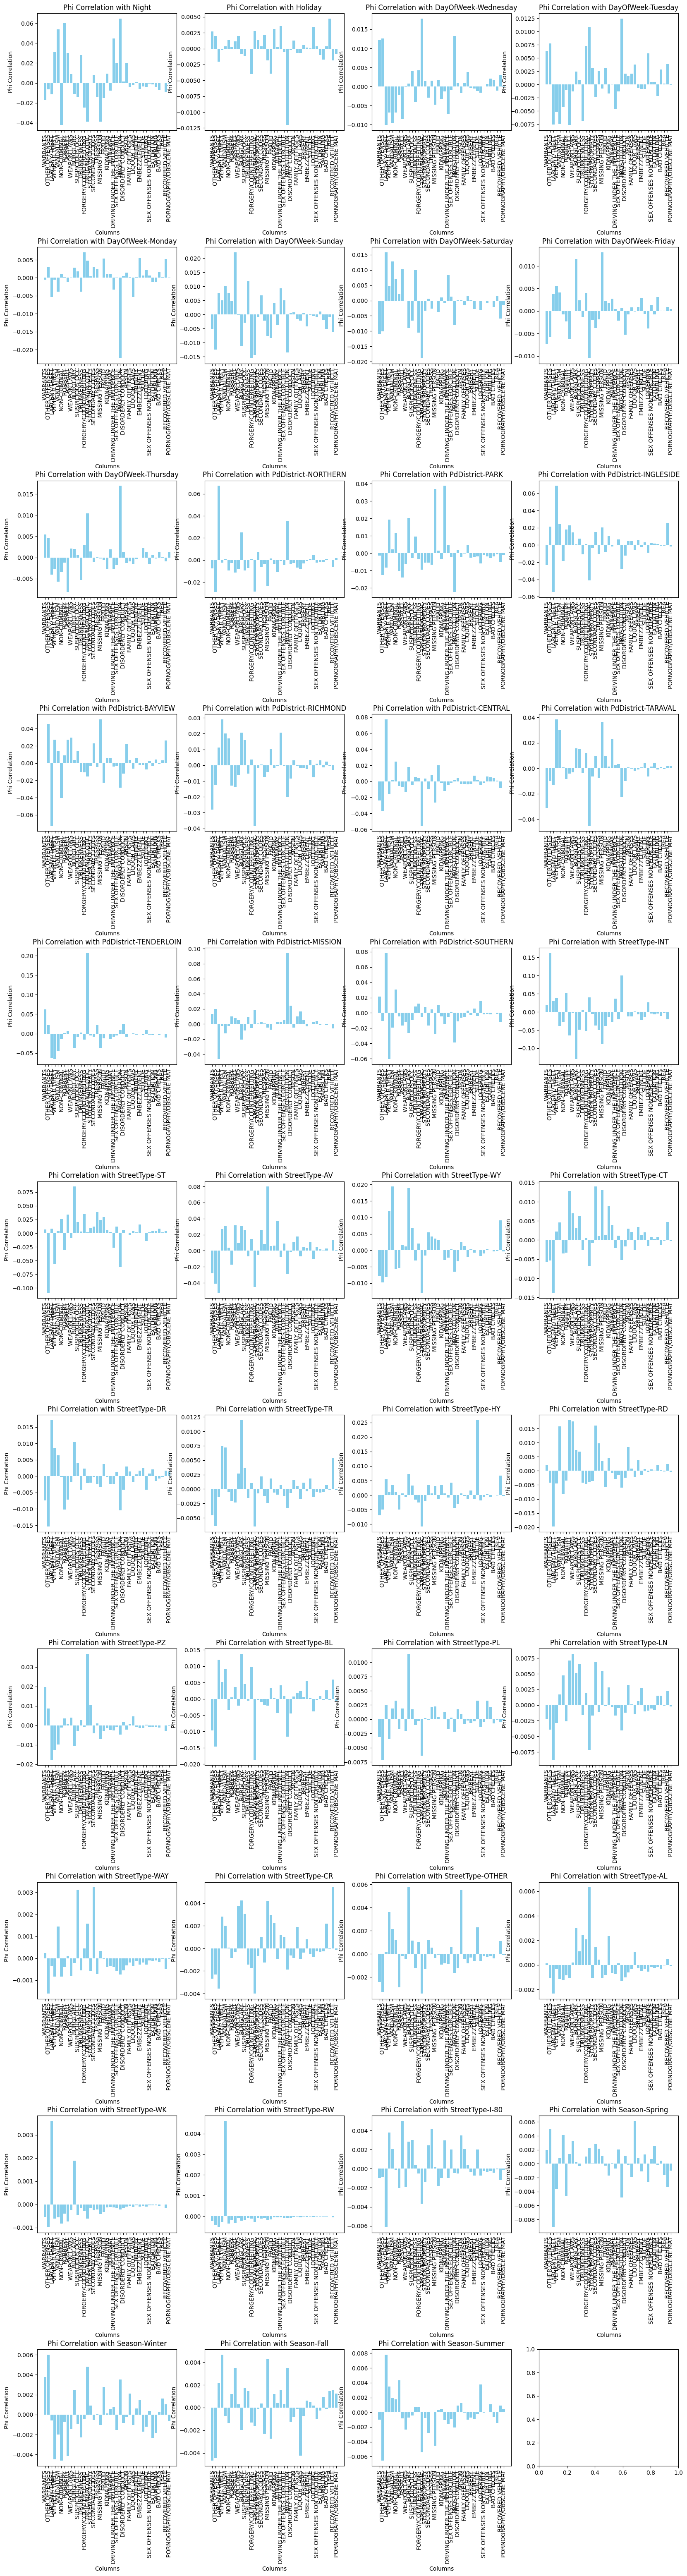

In [4]:
def calculate_phi(a, b, c, d):
    numerator = (a * d - b * c)
    part1 = (a + b)
    part2 = (c + d)
    part3 = (a + c)
    part4 = (b + d)
    denominator = np.sqrt(part1 * part2 * part3 * part4)
    if denominator == 0:
        phi = np.nan
    else:
        phi = numerator / denominator
    return phi

categories = data.filter(like='Category-', axis=1)
binary_columns = data.columns[(data.isin([0, 1]).all())&(~data.columns.str.contains('Category'))]


# Assuming `binary_columns` and `categories` are defined as in your excerpt
num_features = len(binary_columns)
num_rows = math.ceil(num_features / 4)
# Increase the figure height in the figsize parameter. Adjust the height as needed.
fig_height = num_rows * 5 + num_rows * 2  # Increase the height based on the number of rows and desired spacing
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, fig_height))

for idx, feature in enumerate(binary_columns):
    corr = {}
    for column in categories.columns:
        contingency_table = pd.crosstab(data[column], data[feature])
        a = float(contingency_table.iloc[1, 1])
        b = float(contingency_table.iloc[1, 0])
        c = float(contingency_table.iloc[0, 1])
        d = float(contingency_table.iloc[0, 0])
        corr[column] = calculate_phi(a, b, c, d)

    row_idx = idx // 4
    col_idx = idx % 4
    
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    x_positions = [x.split('Category-')[-1] for x in list(corr.keys())]
    y_values = list(corr.values())
    ax.bar(x_positions, y_values, color='skyblue')
    
    ax.set_xlabel('Columns')
    ax.set_ylabel('Phi Correlation')
    ax.set_title(f'Phi Correlation with {feature}')
    ax.tick_params(axis='x', rotation=90)

# Adjust the space between rows without shrinking the plots
plt.subplots_adjust(hspace=1)  # Adjust hspace as needed

plt.show()

Spearman: Ordinal und Binär

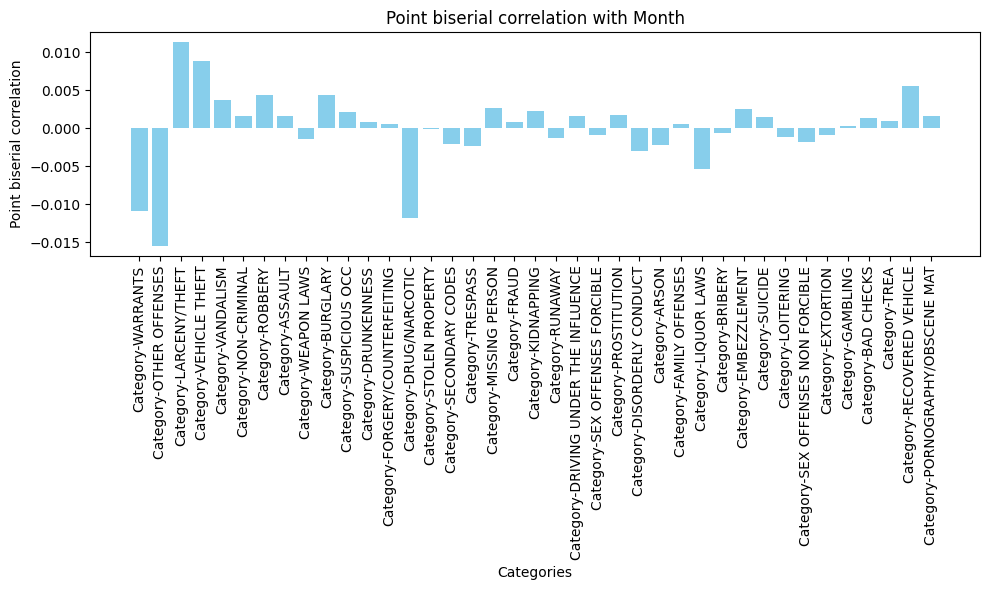

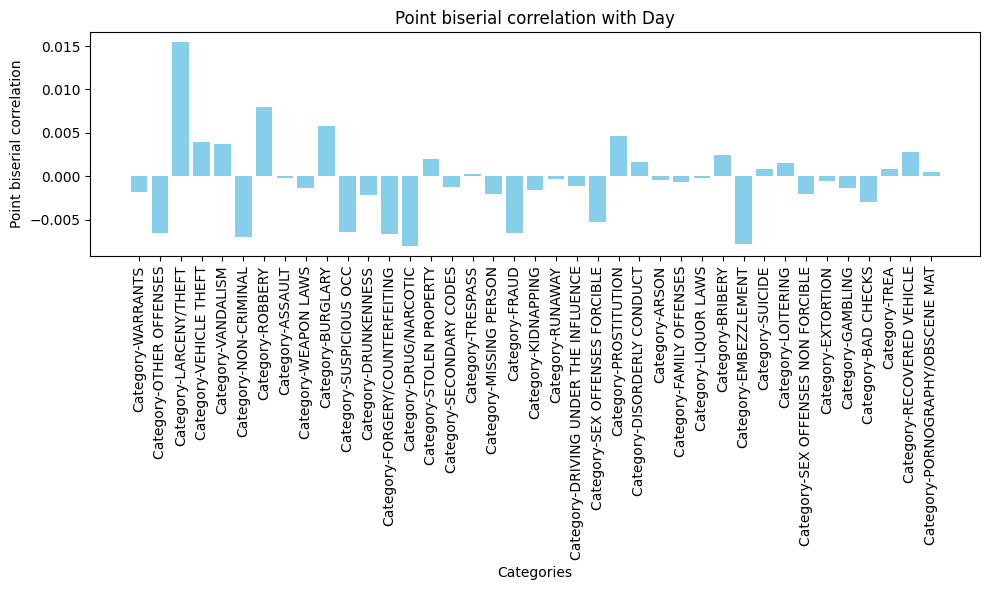

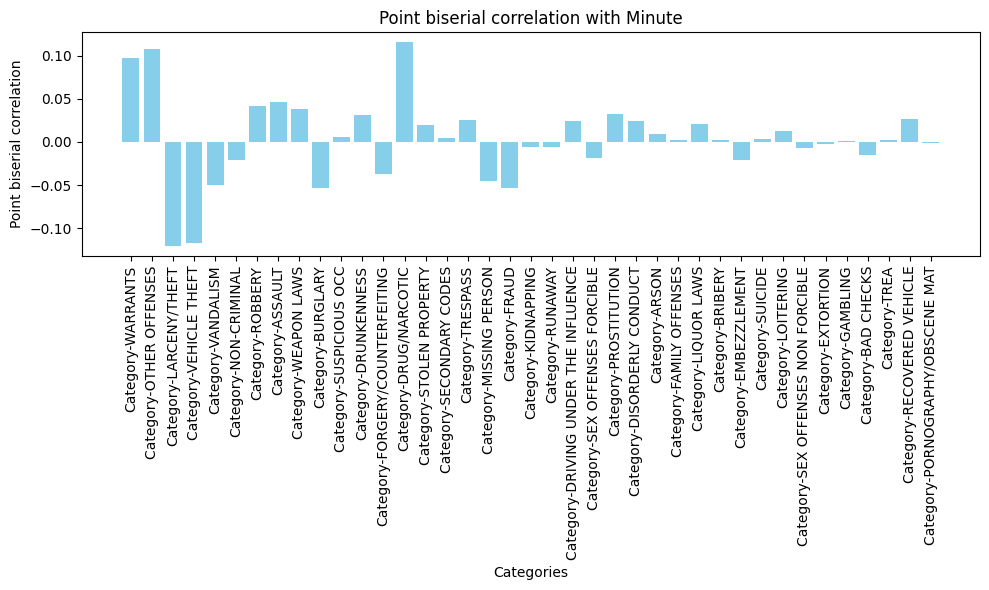

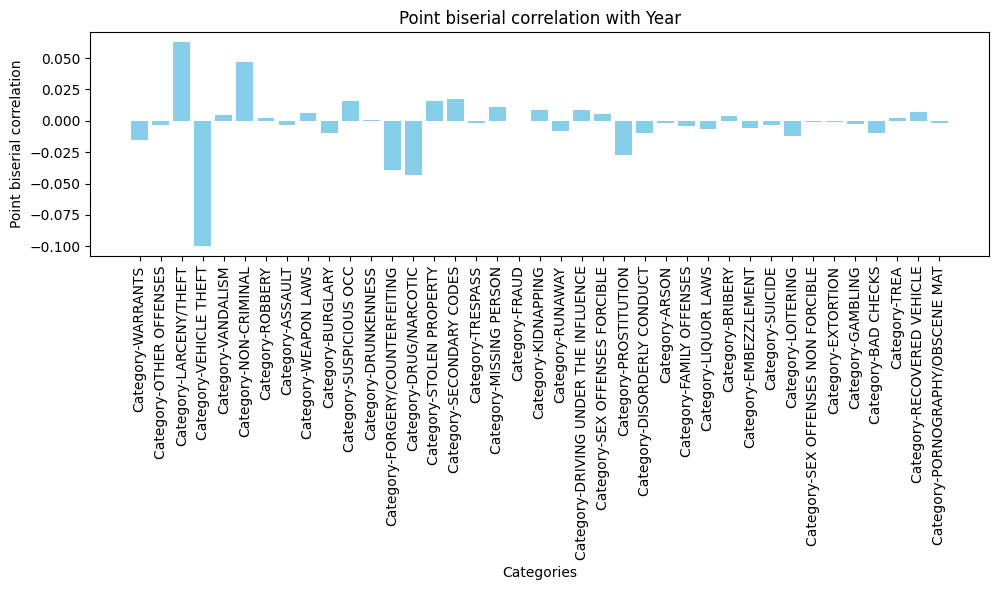

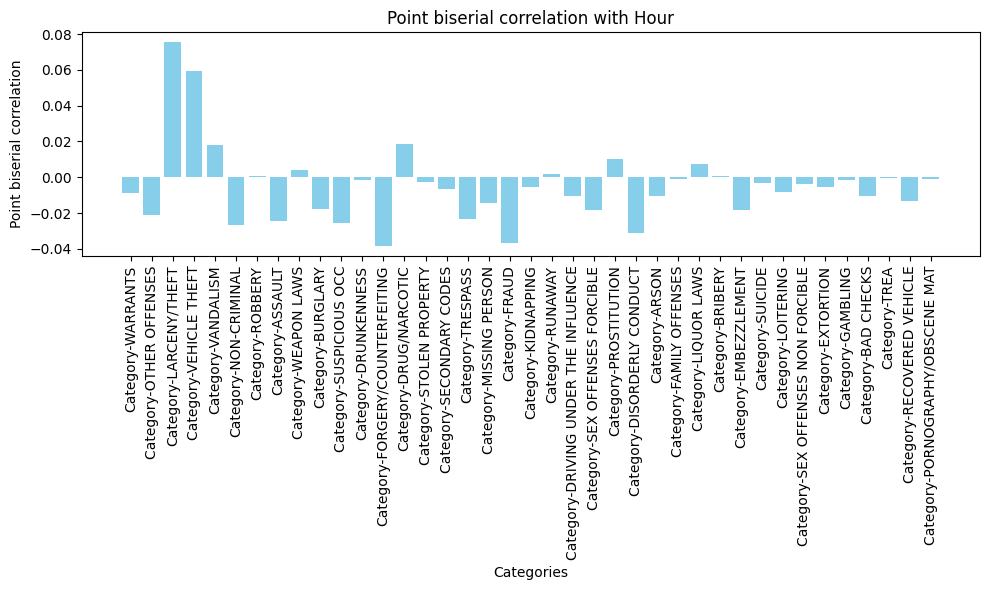

In [5]:
categories = data.filter(like='Category-', axis=1)
features = ['Month', 'Day', 'Minute', 'Year', 'Hour']


corr = {}
for feature in features:
    for column in categories.columns:
        correlation = data[feature].corr(data[column], method='spearman')
        corr[column] = correlation

    # Prepare data for plotting
    categories_names = list(corr.keys())
    correlation_values = list(corr.values())

    # Plotting
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(categories_names, correlation_values, color='skyblue')
    plt.xlabel('Categories')
    plt.ylabel('Point biserial correlation')
    plt.title(f'Point biserial correlation with {feature}')
    plt.xticks(rotation=90)  # Rotate category names for better readability

    # Adjust the space between rows without shrinking the plots if necessary
    plt.tight_layout()

plt.show()